### Analyze Fast Food Menu and Meal Combination Data

Code to analyze the nutritional content of menu items and meal combinations at fast food chains.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import Image

### Import menu, meal, and goal data

In [39]:
# df_menu contains the nutritional information for every menu item at each restaurant.
df_menu = pd.read_csv(r'C:\Users\Jenny\menu_nf.csv', index_col=0)

# df_goal_daily contains daily nutritional goals based on four scenarios: 1500, 2000, 2500, and 2500 calories per day.
# df_goal_meal contains the nutritional goals for this fast food meal, assuming it represents 40% of the daily goal's nutrition.
df_goal_daily = pd.read_csv(r'C:\Users\Jenny\goal_daily.csv', index_col=0)
df_goal_meal = pd.read_csv(r'C:\Users\Jenny\goal_meal.csv', index_col=0)

# df_meal_0 contains the meal combination options for scenario_0 (1500 calories per day).
# df_meal_1 assumes 2000 calories, df_meal_2 assumes 2500 calories, and df_meal_3 assumes 3000 calories.
# Each df_meal dataframe has three meal_types: entree_only, entree_side, and entree_side_dessert.
df_meal_0 = pd.read_csv(r'C:\Users\Jenny\meal_0.csv', index_col=0)
df_meal_1 = pd.read_csv(r'C:\Users\Jenny\meal_1.csv', index_col=0)
df_meal_2 = pd.read_csv(r'C:\Users\Jenny\meal_2.csv', index_col=0)
df_meal_3 = pd.read_csv(r'C:\Users\Jenny\meal_3.csv', index_col=0)

In [40]:
# Remove and reorder columns from df_menu.
df_menu = df_menu.drop(['dietary_fiber','brand_id', 'last_updated','serving_size_qty','serving_size_unit', 'serving_weight_grams', 'servings_per_container'], axis=1)
df_menu = df_menu[['brand_name',"item_name", "calories", "total_fat", "carbs", "sugar", "protein", "saturated_fat", "cholesterol", "sodium", "item_type", "tag"]]
df_menu.head(5)

,brand_name,item_name,calories,total_fat,carbs,sugar,protein,saturated_fat,cholesterol,sodium,item_type,tag
1,McDonald's,"Southern Style Frozen Strawberry Lemonade, Large",450.0,0.0,119.0,111.0,0.0,0.0,0.0,290.0,drink,none
2,McDonald's,Strawberry & Creme Pie,300.0,15.0,36.0,15.0,3.0,9.0,15.0,190.0,dessert,none
3,McDonald's,"Southern Style Frozen Strawberry Lemonade, Medium",350.0,0.0,92.0,86.0,0.0,0.0,0.0,230.0,drink,none
4,McDonald's,"Red Flash, Small",160.0,0.0,41.0,41.0,0.0,0.0,0.0,40.0,drink,none
5,McDonald's,Chicken Selects (3 Piece),380.0,22.0,21.0,0.0,24.0,3.5,70.0,690.0,entree,none


### How nutritious is the food at each restaurant?

In [41]:
# Average macronutrient profile for each item_type
df_group_brand = df_menu.groupby(['item_type','brand_name'])[['calories','total_fat','carbs','sugar','protein']].mean().round().drop(['misc', 'drink'])
df_group_brand

calories  total_fat  carbs  sugar  protein
item_type brand_name                                             
dessert   Burger King  380.0     13.0       59.0   44.0   7.0    
          McDonald's   378.0     13.0       50.0   41.0   7.0    
          Taco Bell    370.0     20.0       44.0   23.0   4.0    
          Wendy's      395.0     10.0       66.0   55.0   11.0   
entree    Burger King  541.0     32.0       40.0   8.0    25.0   
          McDonald's   533.0     26.0       48.0   9.0    26.0   
          Taco Bell    417.0     19.0       42.0   3.0    16.0   
          Wendy's      417.0     22.0       31.0   7.0    24.0   
side      Burger King  368.0     20.0       41.0   2.0    6.0    
          McDonald's   289.0     13.0       35.0   4.0    8.0    
          Taco Bell    278.0     14.0       32.0   2.0    6.0    
          Wendy's      356.0     15.0       45.0   5.0    10.0

In [42]:
# Figure out a good graphic - see two ideas below.

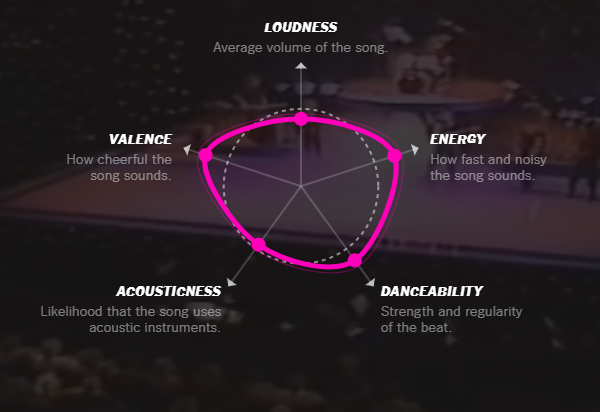

In [2]:
# Option 1:
# Create four plots - one for each item_type.
# For df_group_brand, create a graph with four axes: total_fat, carbs, sugar, and protein. 
# Plot the average total_fat, carb, sugar, and protein for each item_type. It will look like a four point shape.
# Each restaurant has a different color plot. It should be easy to visually compare the nutritional values of each restaurant. See example below for songs.

Image(filename='sample_graph.png')

In [44]:
# Option 2:
# Create four plots - one for each item_type.
# For df_menu, create a scatterplot with two axes: fat and protein as a % of cal.
# Plot every item on fat and protein content. Items from each restaurant will be a different color. 

# Calculate fat and protein as a % of cal for each menu item.
df_menu['%_fat'] = df_menu.apply(lambda x: round((x['total_fat'] * 9 / x['calories']),2) if x['calories'] > 0 else 'NaN', axis=1)
df_menu['%_protein'] = df_menu.apply(lambda x: round((x['protein'] * 4 / x['calories']),2) if x['calories'] > 0 else 'NaN', axis=1)

### What nutritional goals were analyzed?

Four nutritional goal scenarios were analyzed to create meal combinations: 1500 calories per day (df_meal_0), 2000 calories (df_meal_1), 2500 calories (df_meal_2), and 3000 calories (df_meal_3). Carbohydrate, sugar, and fat goals were set as a percentage of calories in df_goal_daily.

In [45]:
df_goal_daily

,calories,carbs,sugar,total_fat
0,1500.0,225.0,19.0,50.0
1,2000.0,300.0,25.0,67.0
2,2500.0,375.0,31.0,83.0
3,3000.0,450.0,38.0,100.0


The nutritional goal for each meal (df_goal_meal) was set to be 40% of the daily goal.

In [46]:
df_goal_meal

,calories,carbs,sugar,total_fat
0,600.0,90.0,7.6,20.0
1,800.0,120.0,10.0,26.8
2,1000.0,150.0,12.4,33.2
3,1200.0,180.0,15.2,40.0


### How many meal combination options were found for each scenario at each restaurant?

In [47]:
# Groupby and count the meal combinations at each restaurant for each scenario
df_group_count_0 = df_meal_0.groupby(['meal_type','brand_name'])['meal_type'].count()
df_group_count_1 = df_meal_1.groupby(['meal_type','brand_name'])['meal_type'].count()
df_group_count_2 = df_meal_2.groupby(['meal_type','brand_name'])['meal_type'].count()
df_group_count_3 = df_meal_3.groupby(['meal_type','brand_name'])['meal_type'].count()

df_meal_count = pd.concat([df_group_count_0, df_group_count_1, df_group_count_2, df_group_count_3], join='outer', axis=1)
df_meal_count = df_meal_count.fillna(0)
df_meal_count

meal_type  meal_type  meal_type  meal_type
meal_type           brand_name                                             
entree_only         Burger King  18.0       29.0       36.0       40       
                    McDonald's   41.0       78.0       121.0      143      
                    Taco Bell    65.0       75.0       91.0       97       
                    Wendy's      22.0       31.0       40.0       42       
entree_side         Burger King  11.0       57.0       193.0      352      
                    McDonald's   130.0      416.0      1025.0     1693     
                    Taco Bell    457.0      904.0      1215.0     1468     
                    Wendy's      70.0       147.0      285.0      395      
entree_side_dessert Burger King  3.0        24.0       100.0      335      
                    McDonald's   117.0      622.0      2325.0     6347     
                    Taco Bell    0.0        0.0        346.0      1411     
                    Wendy's      0.0        0.0        0.0        11

In [48]:
# Rename each meal_type column with the Scenario & figure out a good graphic.

In [53]:
# At Scenario_2 (2500 cal/day), what is the average nutritional profile for each meal combination at each restaurant?
df_group_mean = df_meal_2.groupby(['meal_type', 'brand_name'])[['calories','total_fat','carbs','sugar','protein']].mean().round()
df_group_mean

calories  total_fat  carbs  sugar  protein
meal_type           brand_name                                             
entree_only         Burger King  338.0     16.0       31.0   6.0    17.0   
                    McDonald's   441.0     21.0       40.0   6.0    23.0   
                    Taco Bell    358.0     16.0       36.0   3.0    14.0   
                    Wendy's      345.0     18.0       26.0   4.0    21.0   
entree_side         Burger King  559.0     26.0       60.0   7.0    21.0   
                    McDonald's   569.0     24.0       62.0   7.0    26.0   
                    Taco Bell    490.0     22.0       54.0   3.0    16.0   
                    Wendy's      534.0     21.0       61.0   7.0    25.0   
entree_side_dessert Burger King  560.0     26.0       60.0   9.0    22.0   
                    McDonald's   590.0     26.0       63.0   8.0    26.0   
                    Taco Bell    534.0     25.0       54.0   12.0   13.0